# Adult Income
<image src = "https://d32ijn7u0aqfv4.cloudfront.net/wp/wp-content/uploads/raw/SOBK0822001_780x440_mobile.jpeg">

# Library

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
import time
import warnings
warnings.filterwarnings('ignore')

# Data Review

In [55]:
# data frame
df = pd.read_csv("data/adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [56]:
print(f"Number of rows of data: {df.shape[0]}")
print(f"Number of columns of data: {df.shape[1]}")

Number of rows of data: 32561
Number of columns of data: 15


**Note**:

+ 1.	`Age`:	Describes the age of individuals. Continuous.
+ 2.	`Workclass`:	Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
+ 3.	`fnlwgt`:	Continuous. This is a weighting factor created by the US Census Bureau and indicates the number of people represented by each   data entry.
+ 4.	`education`:	Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
+ 5.	`education-num`:	Number of years spent in education. Continuous.
+ 6.	`marital-status`:	Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
+ 7.	`occupation`:	Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
+ 8.	`relationship`:	Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
+ 9.	`race`:	White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
+ 10.	`sex`:	Female, Male.
+ 11.	`capital-gain`:	Represents the profit an individual makes from the sale of assets (e.g., stocks or real estate). Continuous.
+ 12.	`capital-loss`:	Represents the loss an individual incurs from the sale of assets (e.g., stocks or real estate). Continuous.
+ 13.	`hours-per-week`:	Continuous.
+ 14.	`native-country`:	United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinidad & Tobago, Peru, Hong, Netherlands.
+ 15.	`salary`:	>50K, <=50K.

In [57]:
print("Column --capital.gain--")
unique_values, counts = np.unique(df['capital.gain'], return_counts=True)
for value, count in zip(unique_values[:5], counts[:5]):
    print(f'Value: {value}, count: {count}')
print("...")
print("-"*50)
print("Column --capital.loss--")
unique_values, counts = np.unique(df['capital.loss'], return_counts=True)
for value, count in zip(unique_values[:5], counts[:5]):
    print(f'Value: {value}, count: {count}')
print("...")

Column --capital.gain--
Value: 0, count: 29849
Value: 114, count: 6
Value: 401, count: 2
Value: 594, count: 34
Value: 914, count: 8
...
--------------------------------------------------
Column --capital.loss--
Value: 0, count: 31042
Value: 155, count: 1
Value: 213, count: 4
Value: 323, count: 3
Value: 419, count: 3
...


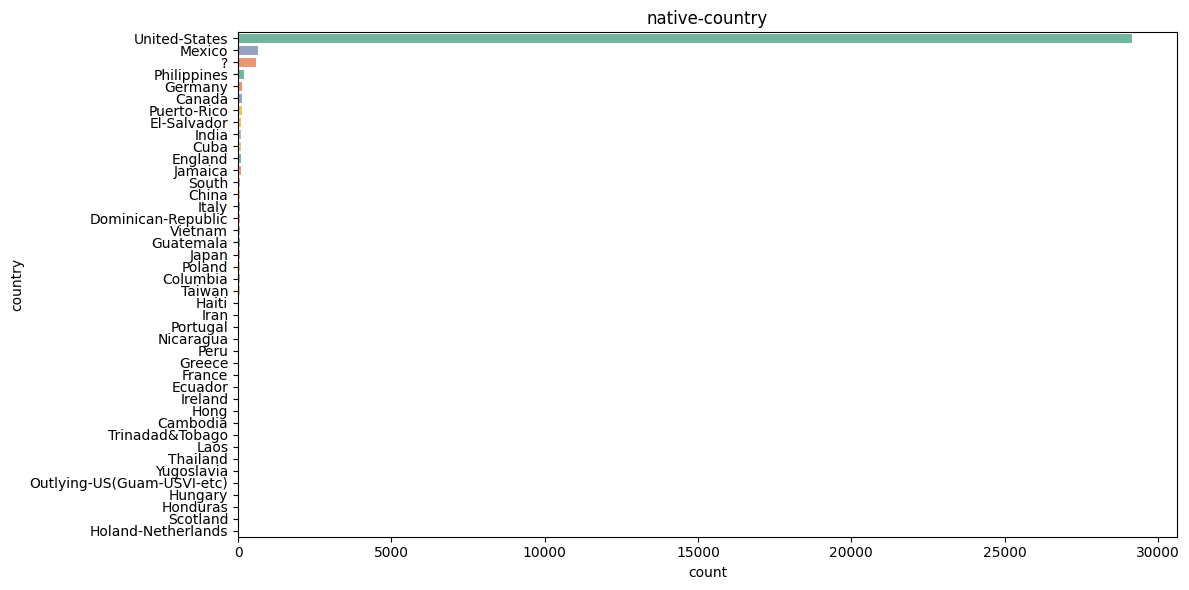

In [58]:
plt.figure(figsize=(12, 6))

sns.countplot(data=df, y='native.country',hue='native.country', order=df['native.country'].value_counts().index, palette='Set2', legend=False)

plt.title('native-country')
plt.xlabel('count')
plt.ylabel('country')

plt.tight_layout()
plt.show()

Note:

+ `fnlwgt`: This is a weight created by the US Census Bureau to represent the number of people each sample represents. While it may be statistically significant in census research, it generally has little impact in predicting income.

+ `capital-gain`, `capital-loss`: Contains too many zeros, the analysis will not make sense.

+ `native-country`: This is a value column that shows a person's original nationality, but they are living in the same country as the United States, all income is calculated in US currency and assets, and the majority of people with US origin nationality are, so analyzing this column is also not valuable.

In [59]:
columns_to_drop = ['fnlwgt', 'capital.gain', 'capital.loss', 'native.country']
df = df.drop(columns=columns_to_drop)

#### Check data information - Null, type

In [60]:
df.shape

(32561, 11)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education.num   32561 non-null  int64 
 4   marital.status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   hours.per.week  32561 non-null  int64 
 10  income          32561 non-null  object
dtypes: int64(3), object(8)
memory usage: 2.7+ MB


In [62]:
# Identify columns with null values
missing_columns = df.columns[df.isnull().any()]
print(missing_columns)

Index([], dtype='object')


Checking, all rows do not have null column values, but the data contains the character `"?"`, so this is a `null` value, filled in as a character.

<p>
  <img src="illustration/1.png" alt="Image 1" width="800"/>
  <img src="https://vnmedia2.monkeyuni.net/upload/web/img/cac-tu-nghi-van-trong-tieng-viet-3.jpg" alt="Image 2" width="300"/>
</p>

In [63]:
df[df == '?'] = np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   education       32561 non-null  object
 3   education.num   32561 non-null  int64 
 4   marital.status  32561 non-null  object
 5   occupation      30718 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   hours.per.week  32561 non-null  int64 
 10  income          32561 non-null  object
dtypes: int64(3), object(8)
memory usage: 2.7+ MB


In [64]:
df.head(3)

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,income
0,90,NaN,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,40,<=50K
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,<=50K
2,66,NaN,Some-college,10,Widowed,NaN,Unmarried,Black,Female,40,<=50K


In [65]:
# Identify columns with null values
missing_columns = df.columns[df.isnull().any()]
print(missing_columns)

Index(['workclass', 'occupation'], dtype='object')


In [66]:
'''Browse the unique values ​​in each column to get the most comprehensive overview 
of the values ​​in the data frame, and see the columns with `"nan"` values, 
and find ways to solve them to make the data more perfect.''' 

for column in list(df.columns):
    print(f"The unique values ​​of column ${column} are: \n {np.unique(df[column].astype(str))}")
    print()

The unique values ​​of column $age are: 
 ['17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43' '44'
 '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57' '58'
 '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71' '72'
 '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83' '84' '85' '86'
 '87' '88' '90']

The unique values ​​of column $workclass are: 
 ['Federal-gov' 'Local-gov' 'Never-worked' 'Private' 'Self-emp-inc'
 'Self-emp-not-inc' 'State-gov' 'Without-pay' 'nan']

The unique values ​​of column $education are: 
 ['10th' '11th' '12th' '1st-4th' '5th-6th' '7th-8th' '9th' 'Assoc-acdm'
 'Assoc-voc' 'Bachelors' 'Doctorate' 'HS-grad' 'Masters' 'Preschool'
 'Prof-school' 'Some-college']

The unique values ​​of column $education.num are: 
 ['1' '10' '11' '12' '13' '14' '15' '16' '2' '3' '4' '5' '6' '7' '8' '9']

The unique values ​​of column $marital.status are: 
 ['Divorced' 'Marr

**Reviews:**

With `Number of rows of data: 32537`, We have columns with missing information:

+ `workclass`: ['Federal-gov' 'Local-gov' 'Never-worked' 'Private' 'Self-emp-inc''Self-emp-not-inc' 'State-gov' 'Without-pay' '`nan`']

+ `occupation`: ['Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Exec-managerial' 'Farming-fishing' 'Handlers-cleaners' 'Machine-op-inspct' 'Other-service' 'Priv-house-serv' 'Prof-specialty' 'Protective-serv' 'Sales' 'Tech-support' 'Transport-moving' '`nan`']

+ `native.country`: ['Cambodia' 'Canada' 'China' 'Columbia' 'Cuba' 'Dominican-Republic'
'Ecuador' 'El-Salvador' 'England' 'France' 'Germany' 'Greece' 'Guatemala'
'Haiti' 'Holand-Netherlands' 'Honduras' 'Hong' 'Hungary' 'India' 'Iran'
'Ireland' 'Italy' 'Jamaica' 'Japan' 'Laos' 'Mexico' 'Nicaragua'
'Outlying-US(Guam-USVI-etc)' 'Peru' 'Philippines' 'Poland' 'Portugal'
'Puerto-Rico' 'Scotland' 'South' 'Taiwan' 'Thailand' 'Trinadad&Tobago'
'United-States' 'Vietnam' 'Yugoslavia' '`nan`']


## Handling Missing Values

In [67]:
print(f"Total block missed in data frame: {df.isnull().sum().sum()}")

Total block missed in data frame: 3679


In [68]:
def CHECK_MISSING_PERCENTAGE():
    missing_count = df.isnull().sum()
    missing_percentage = round(missing_count / df.shape[0] * 100, 2)
    missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
    return missing_df

In [69]:
CHECK_MISSING_PERCENTAGE()

,count,percentage
age,0,0.00
workclass,1836,5.64
education,0,0.00
education.num,0,0.00
marital.status,0,0.00
occupation,1843,5.66
relationship,0,0.00
race,0,0.00
sex,0,0.00
hours.per.week,0,0.00


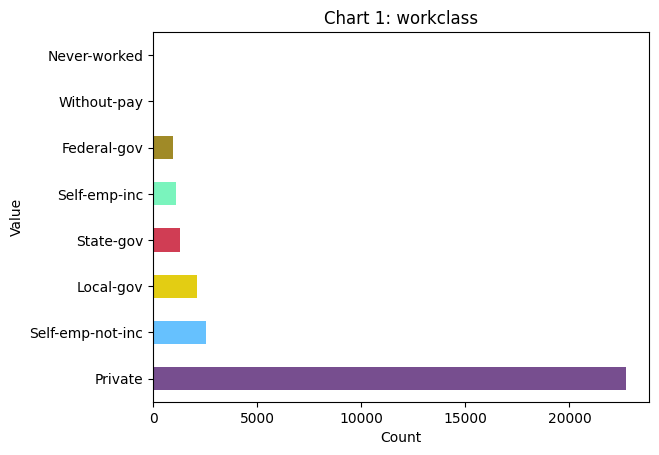

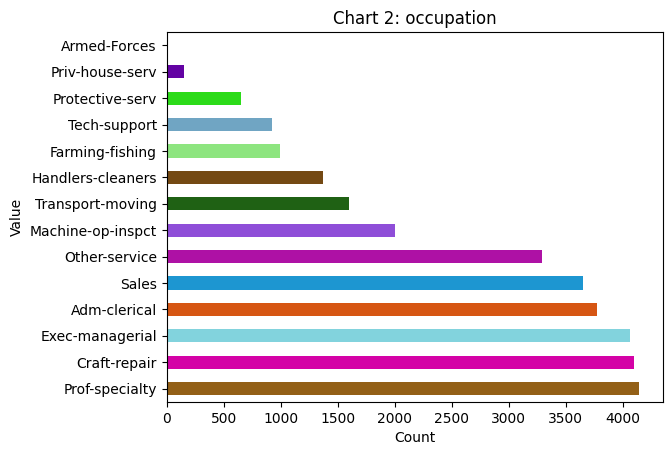

In [70]:
for idx,col in enumerate(missing_columns):
    value_counts = df[col].value_counts()
    count_unique = len(list(np.unique(df[col].astype(str))))
    colors = np.random.rand(count_unique, 3)
    value_counts.plot(kind='barh', color = colors)

    plt.title(f"Chart {idx + 1}: {col}")
    plt.xlabel('Count')
    plt.ylabel('Value')
    plt.show()

- So with charts 1, we can see that the percentage of numbers skewed to one column is very high, so with these two tables, we will fill in the most common values ​​in the cells.

- With chart 2, we will spread the values ​​evenly into the cells.

In [71]:
# Handle missing for 'workclass', 'native.country'
MODE_HANDLE_MISSING = ['workclass']

for col in MODE_HANDLE_MISSING:
    # Get mode value
    most_frequent_value = df[col].mode()[0]
    df[col] = df[col].fillna(most_frequent_value)
    
    print(f"Status of --{col}--: Success")


Status of --workclass--: Success


In [72]:
# Handle missing for 'occupation'
value_unique_occupation = list(np.unique(df['occupation'].astype(str)))
missing_indices_occupation = df[df['occupation'].isnull()].index
missing_indices_occupation

for i, idx in enumerate(missing_indices_occupation):
    df.at[idx, 'occupation'] = value_unique_occupation[i % len(value_unique_occupation)]
    
print("Status of --occupation--: Success")

Status of --occupation--: Success


In [73]:
CHECK_MISSING_PERCENTAGE()

,count,percentage
age,0,0.0
workclass,0,0.0
education,0,0.0
education.num,0,0.0
marital.status,0,0.0
occupation,0,0.0
relationship,0,0.0
race,0,0.0
sex,0,0.0
hours.per.week,0,0.0


So we have successfully solved the missing values.

### Duplicate handle

In [74]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 4587


In [75]:
df.drop_duplicates(keep='first', inplace=True)
print("Duplicate resolved")

Duplicate resolved


In [76]:
"""
#Initial: 

Number of rows of data: 32561
Number of columns of data: 15

"""

print(f"Number of rows of data: {df.shape[0]}")
print(f"Number of columns of data: {df.shape[1]}")

Number of rows of data: 27974
Number of columns of data: 11


## Hypothesis

Certain features such as `education`, `age`, and `occupation` will have the strongest predictive power for determining income. I hypothesize that more educated individuals or those in higher-tier occupations are likely to earn more than 50K USD.

In [77]:
# Convert income values to binary: 0 for <=50K, 1 for >50K

df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

In [78]:
df.sample(3)

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,income
19989,68,Private,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,40,0
24636,50,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,35,0
18814,45,Private,Assoc-voc,11,Divorced,Other-service,Not-in-family,White,Female,8,0


In [79]:
income_less_50K = df[df['income'] == 0].shape[0]
income_over_50K = df[df['income'] == 1].shape[0]

print(f"Income <= 50K (0) count: {income_less_50K}")
print(f"Income >  50K (1) count: {income_over_50K}")

Income <= 50K (0) count: 21351
Income >  50K (1) count: 6623


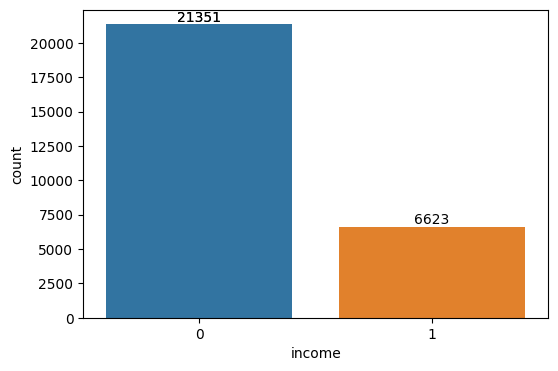

In [80]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x="income", hue="income", legend=False)

ax.bar_label(ax.containers[0])
for container in ax.containers:
    ax.bar_label(container)

plt.show()

## Hypothesis testing

#### Feature Engineering and Outliers

In [81]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
age,27974.0,39.263852,13.806443,17.0,28.0,38.0,49.0,90.0
education.num,27974.0,10.076857,2.654652,1.0,9.0,10.0,13.0,16.0
hours.per.week,27974.0,40.571888,12.912730,1.0,38.0,40.0,45.0,99.0
income,27974.0,0.236756,0.425099,0.0,0.0,0.0,0.0,1.0


In [82]:
df.describe(include="object").T

,count,unique,top,freq
workclass,27974,8,Private,20253
education,27974,16,HS-grad,8480
marital.status,27974,7,Married-civ-spouse,12380
occupation,27974,15,Prof-specialty,3821
relationship,27974,6,Husband,10671
race,27974,5,White,23354
sex,27974,2,Male,18280


In [83]:
cat_features = df.select_dtypes(include=['object']).columns.tolist()
cat_features = [col for col in cat_features if col != 'income']
print("cat_features:",cat_features)

num_features = df.select_dtypes(include=['number']).columns.tolist()
print("num_features:",num_features)

cat_features: ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
num_features: ['age', 'education.num', 'hours.per.week', 'income']


##### Categorical Features

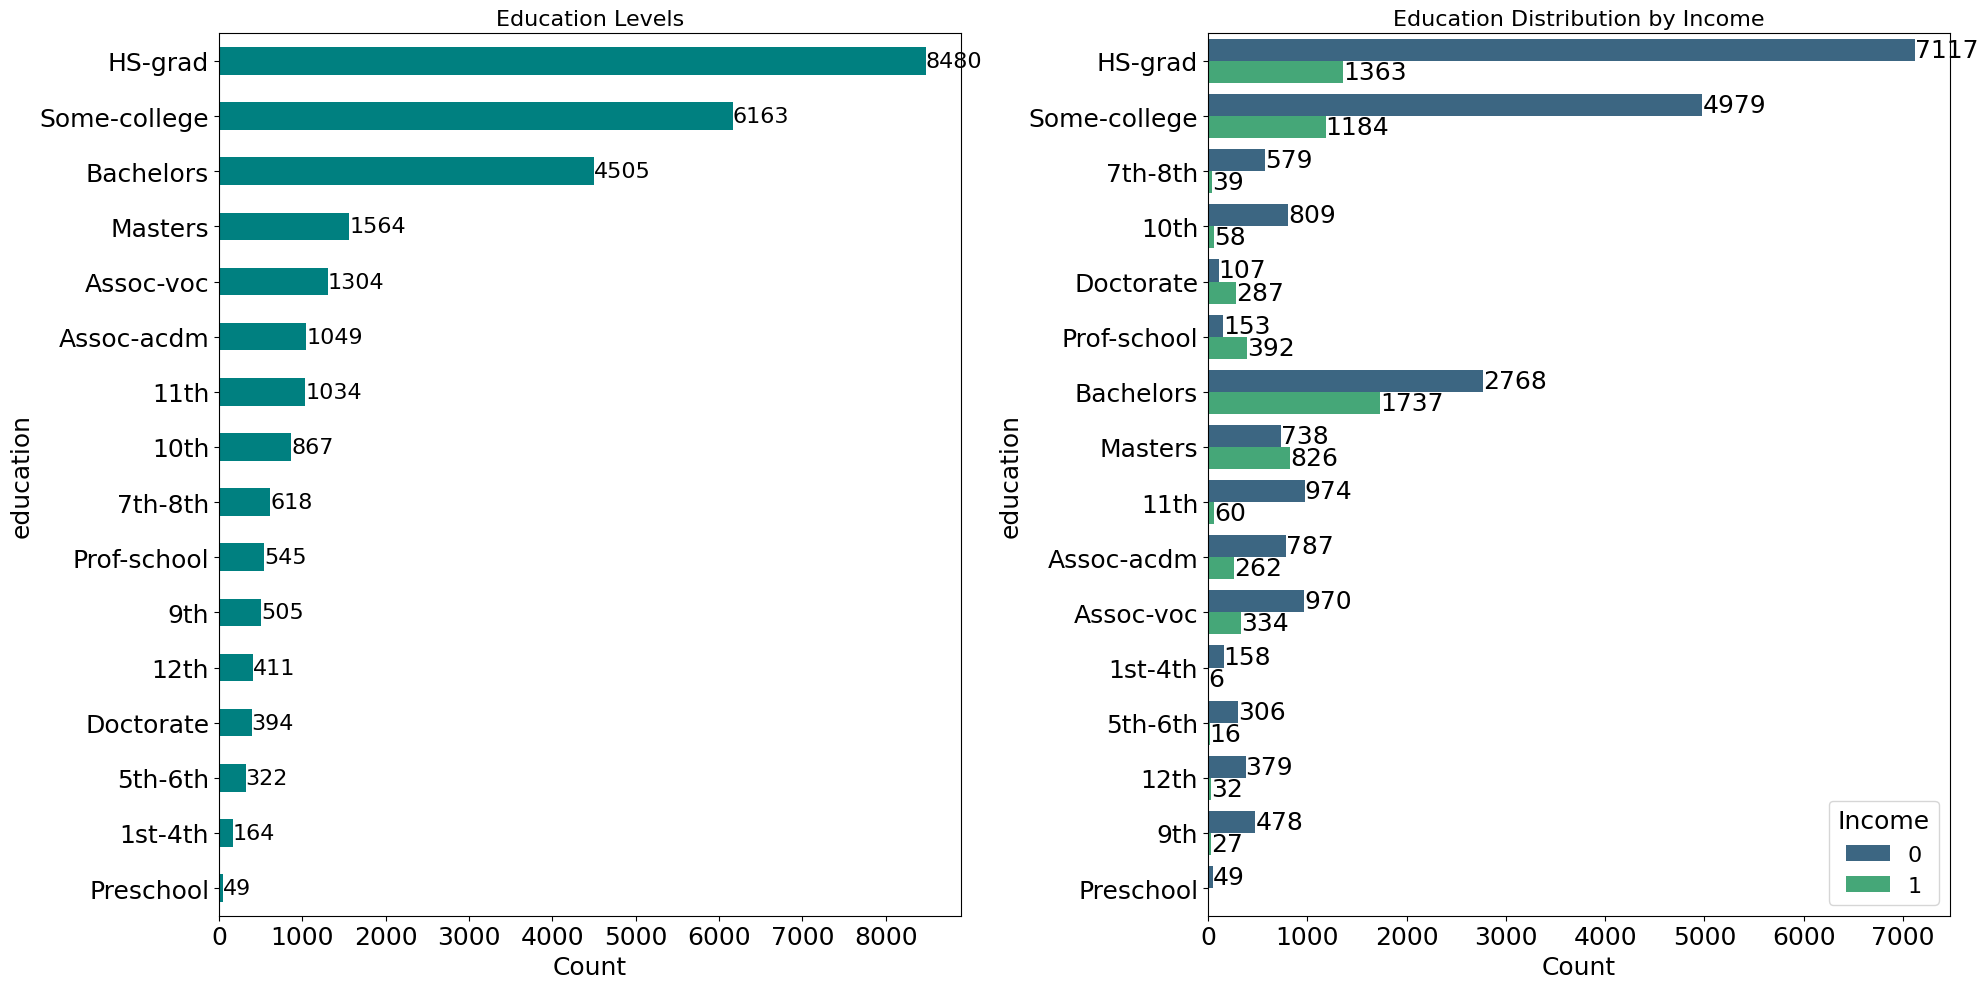

In [84]:
sorted_education = df['education'].value_counts().index[::-1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Birinci grafik: Top Education Levels
counts = df['education'].value_counts().reindex(sorted_education)
counts.plot(kind="barh", ax=ax1, color="teal")
ax1.set_title('Education Levels', fontsize=16)
ax1.bar_label(ax1.containers[0], labels=counts.values, fontsize=16)
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax1.set_xlabel('Count', fontsize=18) 
ax1.set_ylabel('education', fontsize=18);

# İkinci grafik: Education Distribution by Income
sns.countplot(y=df["education"], hue=df['income'].astype(str), ax=ax2, palette='viridis')
ax2.set_title('Education Distribution by Income', fontsize=16)
ax2.legend(title='Income', loc='lower right', fontsize=16, title_fontsize='18')
ax2.tick_params(axis='x', labelsize=18)
ax2.tick_params(axis='y', labelsize=18)
ax2.set_xlabel('Count', fontsize=18) 
ax2.set_ylabel('education', fontsize=18);

for container in ax2.containers:
    ax2.bar_label(container, fontsize=18)

plt.tight_layout()
plt.show()

<p align="center">
  <img src="illustration/2.png" alt="Image 1" width="1000"/>
  <div style = "height:100%">
    Education Column:
    <div>
    The education column was grouped to consolidate similar levels of education into broader categories.
    "Primary" includes 1st-4th', '5th-6th levels, "Middle-School" covers 6th to 8th, "High-School" represents high school graduates(HS_grad), "College" combines some college and associate degrees, while "Bachelors" and "Doctorate" remain as distinct categories for those specific degrees.
    This grouping simplifies analysis by reducing the number of unique categories.
    </div>
  </div>
</p>


In [85]:
df['education'].replace(['1st-4th', '5th-6th'], 'Primary', inplace=True)
df['education'].replace(['7th-8th', '9th', '10th', '11th', '12th'], 'Middle-School', inplace=True)
df['education'].replace(['HS-grad'], 'High-School', inplace=True)
df['education'].replace(['Some-college', 'Assoc-voc', 'Assoc-acdm'], 'College', inplace=True)
df['education'].replace(['Bachelors'], 'Bachelors', inplace=True)
df['education'].replace(['Prof-school', 'Doctorate'], 'Doctorate', inplace=True)

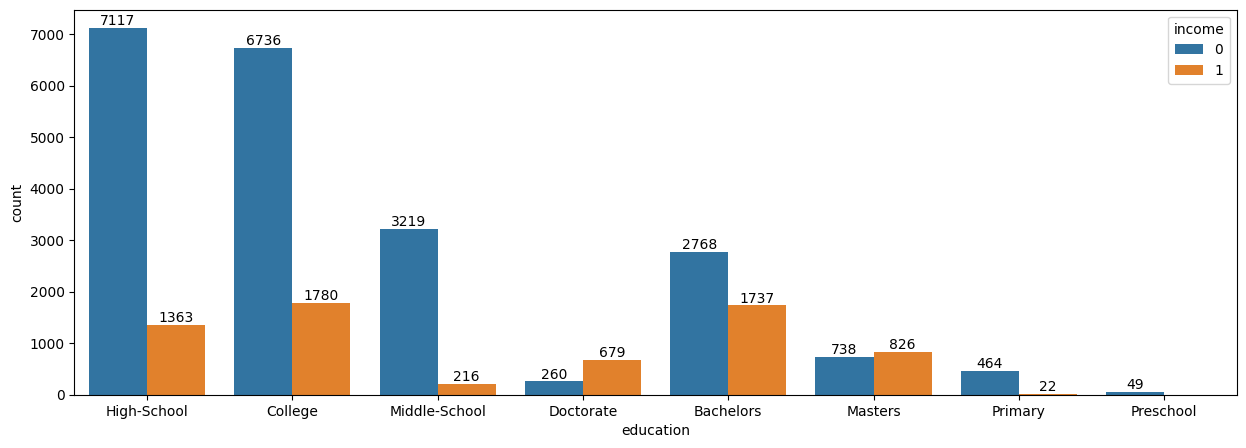

In [86]:
plt.figure(figsize=(15,5))
ax = sns.countplot( data=df, x="education",hue="income")

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

* Preliminary assessment:
    -  The group of people with high degrees accounts for a small part of society, but the difference between the group of people with incomes above 50k USD and below 50k USD has begun to fluctuate clearly, the proportion of people with high incomes has begun to increase, especially for the group of people with doctoral degrees, most of whom are high-income people.

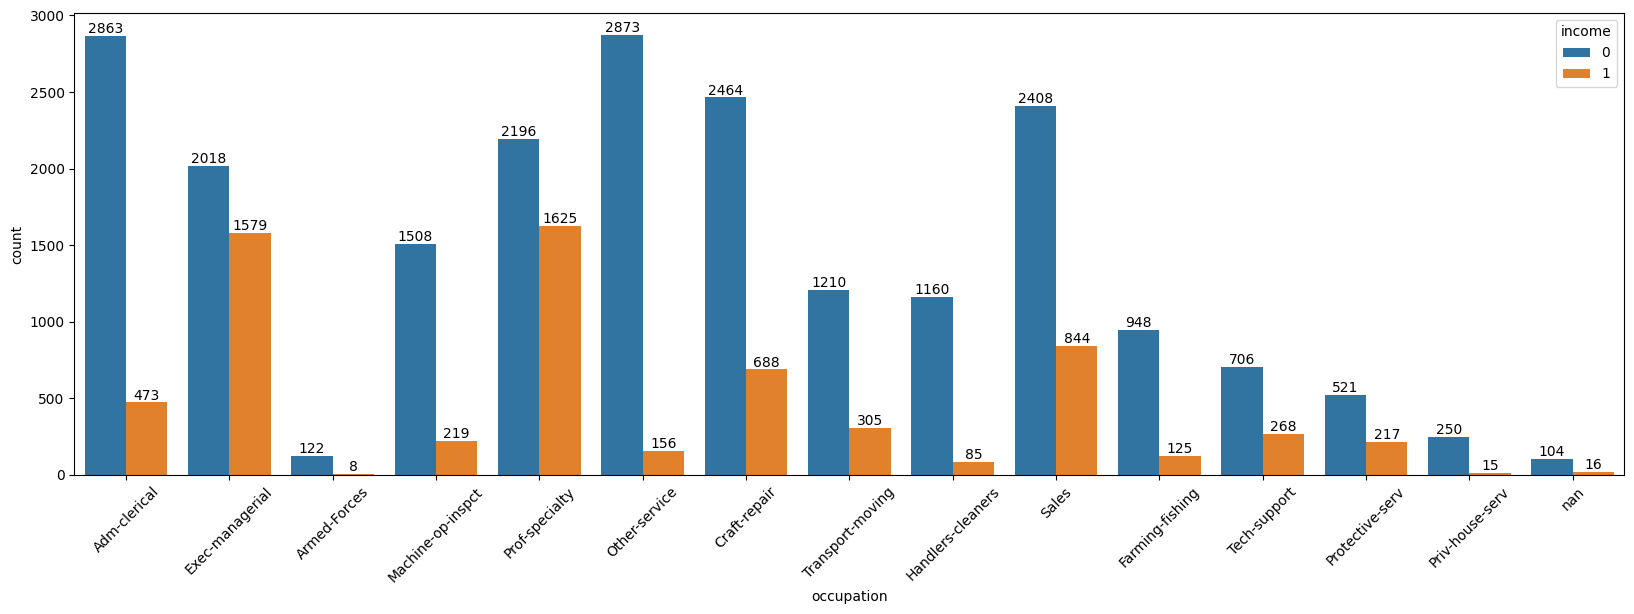

In [87]:
plt.figure(figsize=(20,6))
ax = sns.countplot( data=df, x="occupation",hue='income')

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation=45)
plt.show()

* Preliminary assessment: 
    + The group of management and highly specialized occupations has an average number of participants, but the ratio of high-income and low-income people is relatively balanced. The jobs that require physical strength and are light in nature have the majority of incomes below 50k USD/year.

##### Numerical Features

##### Age

In [88]:
px.histogram(df, x='age', color="income", barmode='group', title='Income Distribution by Age')

#### Observations:
- Income below 50k per year (0):

    + This group dominates most age ranges, especially between the ages of 20 to 40, with significantly higher numbers compared to the group earning above 50k.
    + People aged between 20 to 50 have very high numbers in the below-50k income group, with a peak around the age range of 25 to 30.

- Income above 50k per year (1):

    + The number of people earning more than 50k gradually increases starting around age 25, peaking at around age 40.
    + After age 40, the number of people earning above 50k steadily decreases, especially after age 50, where this group's numbers drop significantly compared to the below-50k group.
    + The above-50k income group is more prevalent in the 30 to 50 age range, but it never exceeds the number of people in the below-50k group.
#### In summary:
- The below-50k group dominates across most age ranges, particularly from ages 20-40.
- The above-50k group starts to appear more frequently in the middle-aged range (30-50 years), but its numbers never surpass those of the below-50k group.
- After age 50, both groups see a decline in numbers, but the above-50k group's decline is much more pronounced.

### Data prepare

In [89]:
df.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,income
0,90,Private,High-School,9,Widowed,Adm-clerical,Not-in-family,White,Female,40,0
1,82,Private,High-School,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,0
2,66,Private,College,10,Widowed,Armed-Forces,Unmarried,Black,Female,40,0
3,54,Private,Middle-School,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,0
4,41,Private,College,10,Separated,Prof-specialty,Own-child,White,Female,40,0


In [90]:
train_df = df[['age', 'education', 'occupation', 'income']]
train_df.sample(3)

,age,education,occupation,income
14600,43,College,Adm-clerical,0
11662,45,College,Exec-managerial,0
21114,31,High-School,Other-service,0


In [91]:
# Data Normalization
label_encoders = {}
for column in ['education', 'occupation']:
    le = LabelEncoder()
    train_df[column] = le.fit_transform(train_df[column])
    label_encoders[column] = le
    

In [92]:
train_df.head(3)

,age,education,occupation,income
0,90,3,0,0
1,82,3,3,0
2,66,1,1,0


In [93]:
print(train_df.dtypes)
print(train_df)

age           int64
education     int32
occupation    int32
income        int64
dtype: object
       age  education  occupation  income
0       90          3           0       0
1       82          3           3       0
2       66          1           1       0
3       54          5           6       0
4       41          1           9       0
...    ...        ...         ...     ...
32554   32          4          12       0
32555   53          4           3       1
32556   22          1          10       0
32557   27          1          12       0
32559   58          3           0       0

[27974 rows x 4 columns]


In [94]:
X = train_df.drop('income', axis=1)
y = train_df['income']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [97]:
# 1. Logistic Regression
start = time.time()
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
end = time.time()
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_reg)}, time: {round(end - start, 2)} s" )

# 2. Random Forest
start = time.time()
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
end = time.time()
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}, time: {round(end - start, 2)} s" )

# 3. XGBoost
start = time.time()
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
end = time.time()
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb)}, time: {round(end - start, 2)} s")

# 4. Support Vector Machine
start = time.time()
svc = SVC()
svc.fit(X_train_scaled, y_train)
y_pred_svc = svc.predict(X_test_scaled)
end = time.time()
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svc)}, time: {round(end - start, 2)} s" )

# 5. K-Nearest Neighbors
start = time.time()
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_scaled, y_train)
y_pred_knn = knn_clf.predict(X_test_scaled)
end = time.time()
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn)}, time: {round(end - start, 2)} s")

Logistic Regression Accuracy: 0.7492403932082217, time: 0.01 s
Random Forest Accuracy: 0.7717605004468275, time: 0.9 s
XGBoost Accuracy: 0.788739946380697, time: 0.07 s
SVM Accuracy: 0.7597855227882038, time: 13.52 s
KNN Accuracy: 0.7590705987488829, time: 0.14 s


Conclusion:

   + Observing the results, the predicted results are relatively low for all 3 models, which proves that my hypothesis about `education`, `age`, and `occupation` determining income is incorrect.   

In [98]:
df.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,income
0,90,Private,High-School,9,Widowed,Adm-clerical,Not-in-family,White,Female,40,0
1,82,Private,High-School,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,0
2,66,Private,College,10,Widowed,Armed-Forces,Unmarried,Black,Female,40,0
3,54,Private,Middle-School,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,0
4,41,Private,College,10,Separated,Prof-specialty,Own-child,White,Female,40,0


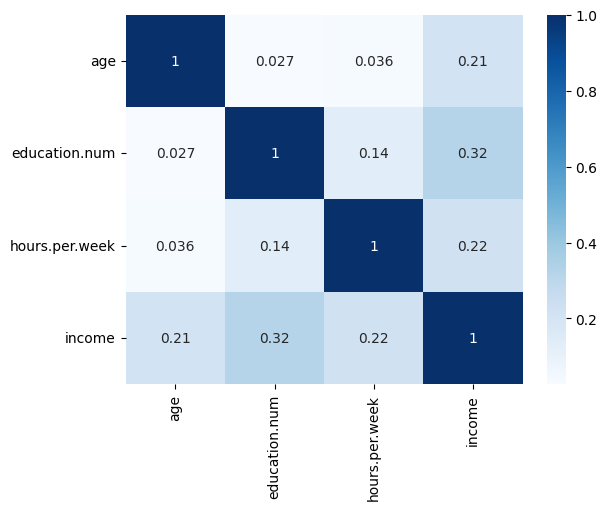

In [102]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="Blues");

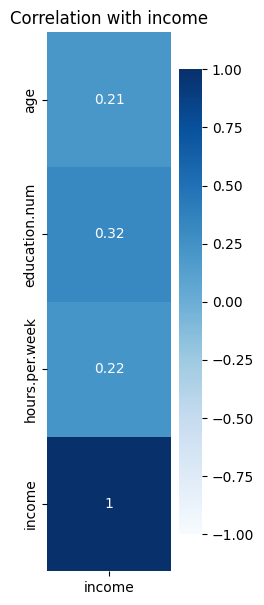

In [103]:
def plot_target_correlation_heatmap(df, target_variable):
    df_numeric = df.select_dtypes(include=[np.number])
    df_corr_target = df_numeric.corr()
    
    plt.figure(figsize=(2, 7))
    sns.heatmap(df_corr_target[[target_variable]], annot=True, vmin=-1, vmax=1, cmap="Blues")
    plt.title(f'Correlation with {target_variable}')
    plt.show()
plot_target_correlation_heatmap(df, 'income')

In [101]:
def color_correlation1(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.6 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.6 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'green'    
    else:
        color = 'black'
    return 'color: %s' % color

numeric_df = df.select_dtypes(include=[np.number])

numeric_df.corr().style.applymap(color_correlation1)

,age,education.num,hours.per.week,income
age,1.000000,0.026765,0.035887,0.209930
education.num,0.026765,1.000000,0.136755,0.322422
hours.per.week,0.035887,0.136755,1.000000,0.223397
income,0.209930,0.322422,0.223397,1.000000
